#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [2]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face detected!" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.6  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
win_title = f"Total number of faces detected are {len(faces_rect)}"
cv2.imshow(win_title, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\anvit\Documents\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


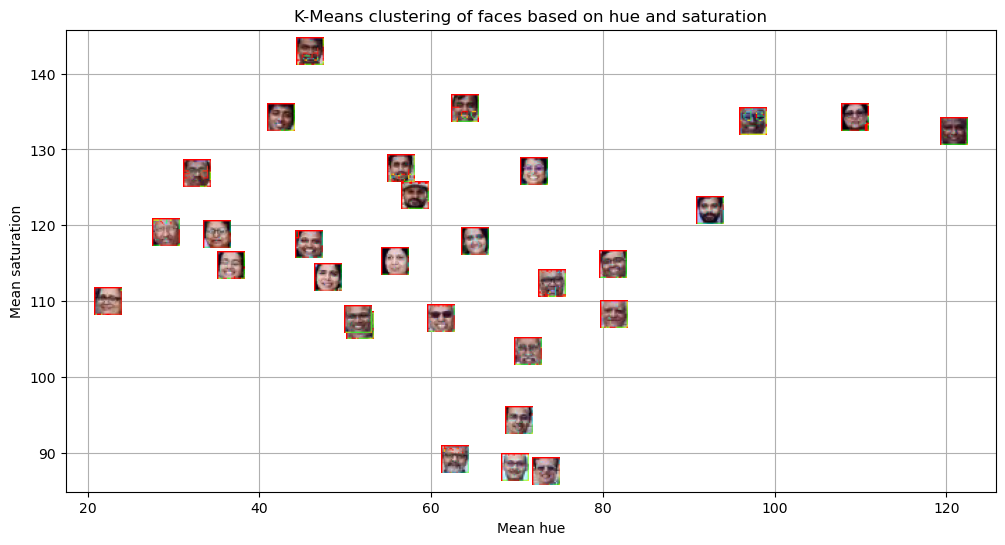

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Mean hue")

## Put y label
plt.ylabel("Mean saturation")

## Put title
plt.title("K-Means clustering of faces based on hue and saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show()

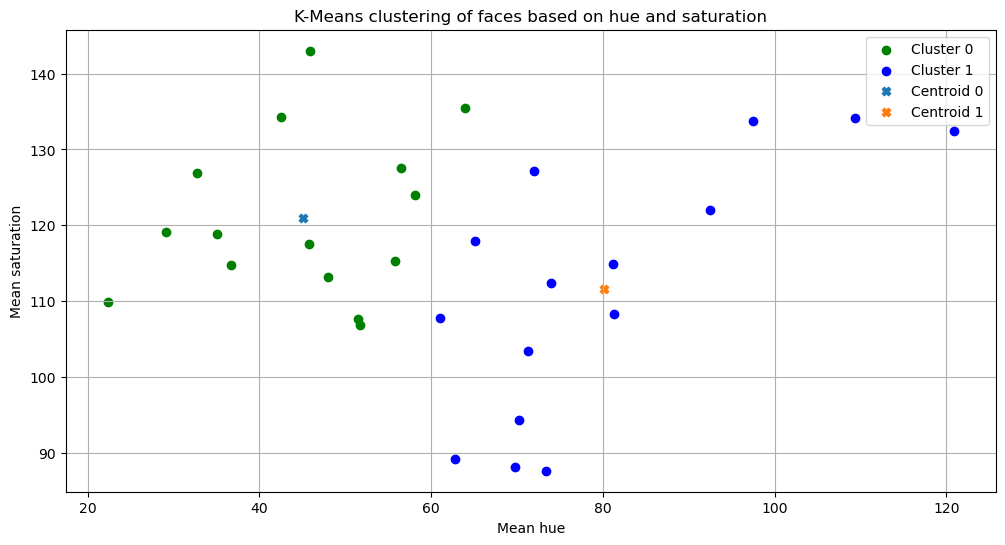

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker='X', label = 'Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='X', label = 'Centroid 1')

## Put x label
plt.xlabel("Mean hue")

## Put y label
plt.ylabel("Mean saturation")

## Put title
plt.title("K-Means clustering of faces based on hue and saturation")

##Add a legend
plt.legend()

## Put grid
plt.grid(True)

## show the plot
plt.show()

In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_faces, scaleFactor=1.1, minNeighbors=5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow(f"Template Image - Total faces detected: {len(template_faces)}", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

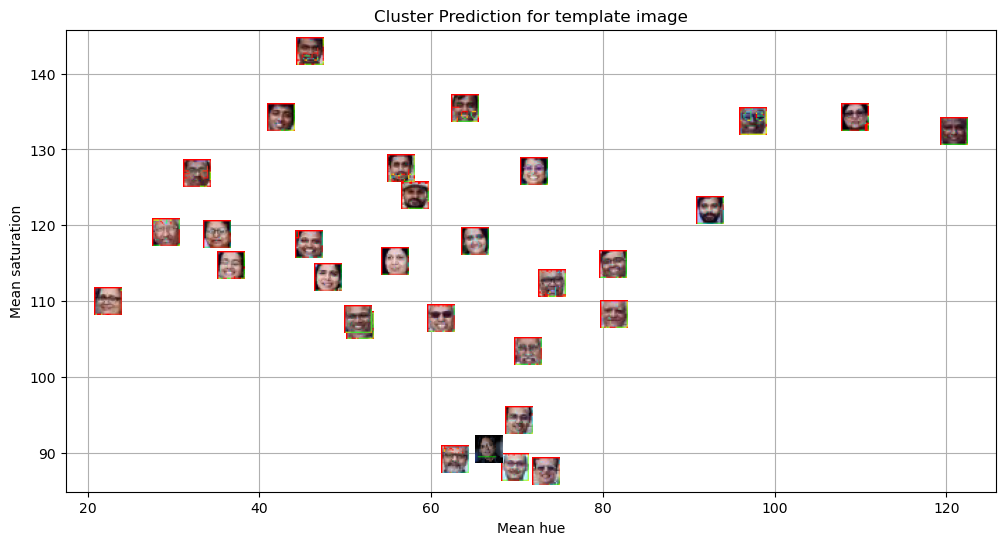

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Mean hue")

## Put y label
plt.ylabel("Mean saturation")

## Put title
plt.title("Cluster Prediction for template image")

## Put grid
plt.grid(True)

## show the plot
plt.show()

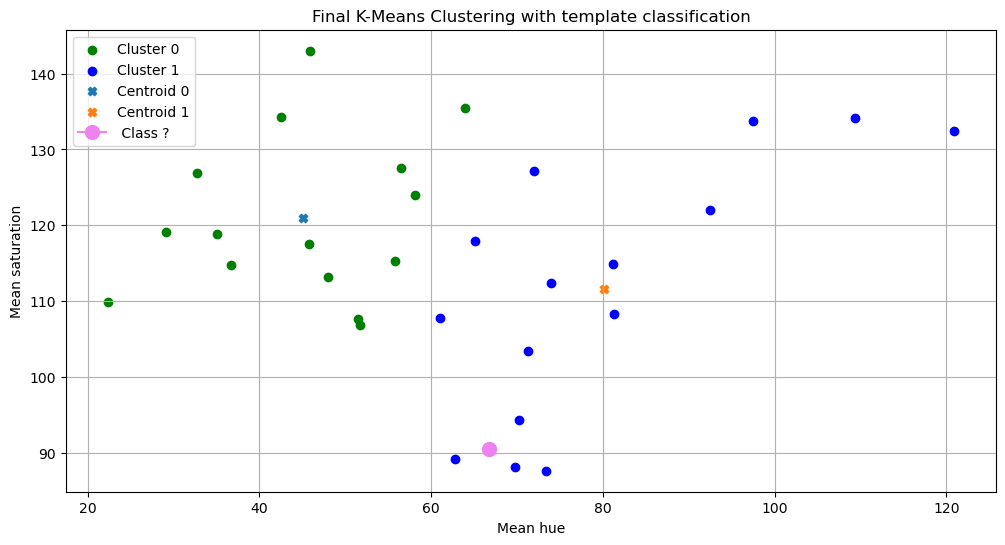

In [8]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='X', label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='X', label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Mean hue")

## Put y label
plt.ylabel("Mean saturation")

## Put title
plt.title("Final K-Means Clustering with template classification")

##Add a legend
plt.legend()

## Put grid
plt.grid(True)

## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
The common metrics used in distance-based classification include:
1. Euclidean Distance (L2 norm)
2. Manhattan Distance (L1 norm)
3. Minkowski Distance (generalized form of Lp norm)
4. Chebyshev Distance (L∞ norm)
5. Mahalanobis Distance
6. Cosine Distance
7. Hamming Distance
#### 2. What are some real-world applications of distance-based classification algorithms? 
Some of the real-world applications of distance-based classification include face recognition, image classification, human pose matching, spam filtering, sentiment analysis, fraud detection, disease classification, medical diagnostics and building recommendation systems.

#### 3. Explain various distance metrics. 
Euclidean distance or L2 norm is the most commonly used distance measure in machine learning. It calculates the straight-line distance between two points in a multidimensional space by taking the square root of the sum of squared differences between their corresponding features. However, in high dimensions, distances become very similar due to sparsity of data points.

Manhattan distance (L1 norm) measures distance by summing the absolute differences between corresponding feature values. Instead of measuring the shortest straight-line path, it measures movement along coordinate axes. It is more stable in higher dimensional spaces than euclidean distance.

Minkowski distance provides a general framework that includes well known metrics. It has a parameter p which determines which distance metric the formula corresponds to. When p=1, it becomes Manhattan distance, when p=2, it becomes Euclidean distance and when p tends to infinity it becomes Chebyshev distance.

Chebyshev distance or the L-infinity norm focuses on the largest absolute difference across all feature dimensions. In effect, it measures the single greatest coordinate-wise deviation between two points.

Mahalanobis distance differs from the previous metrics because it incorporates the covariance structure of the dataset. Rather than treating all features independently, it adjusts for scale and correlation by using the inverse covariance matrix in its computation. It is particularly useful when features are correlated or when identifying outliers in multivariate data.

Cosine distance is based on the angle between two vectors instead oftheir absolute magnitude. It evaluates how similar the orientation of two vectors is regardless of how large they are. Cosine similarity is computed using the dot product divided by the product of vector magnitudes and cosine distance is defined as 1 - similarity.

Hamming distance is mainly used for categorical or binary data. It counts the no. of positions at which two strings or bit sequences differ. Unlike the aforementioned metrics, it uses discrete values and not continuous numerical values.

#### 4. What is the role of cross validation in model performance? 
Cross validation is necessary in model performance due to the following reasons:
1. Model selection - it is used to select the optimal K in K-NN and to select the best hyperparameters
2. To avoid overfitting - instead of relying on train-test split, the dataset is split multiple times and the model is v alidated repeatedly
Without cross-validation, there is a risk of high variance and overfitting to to a specific split.

#### 5. Explain variance and bias in terms of KNN? 
When the value of K is too low, it results in irregular decision boundaries which is sensititve to noise and outliers. As a result, overfitting is seen. This is a case of low bias but high variance. 
When the value of K is too high, it results in decision boundaries which are very smooth. However, this causes the model to predict the majority class very often. This is a case of low variance but high bias. 